In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
import warnings 
warnings.filterwarnings("ignore")
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv("bank-additional-full.csv",sep=";")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.shape


(41188, 21)

In [7]:
df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
df.duplicated().sum()

12

In [9]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
column_headers = list(df.columns.values)

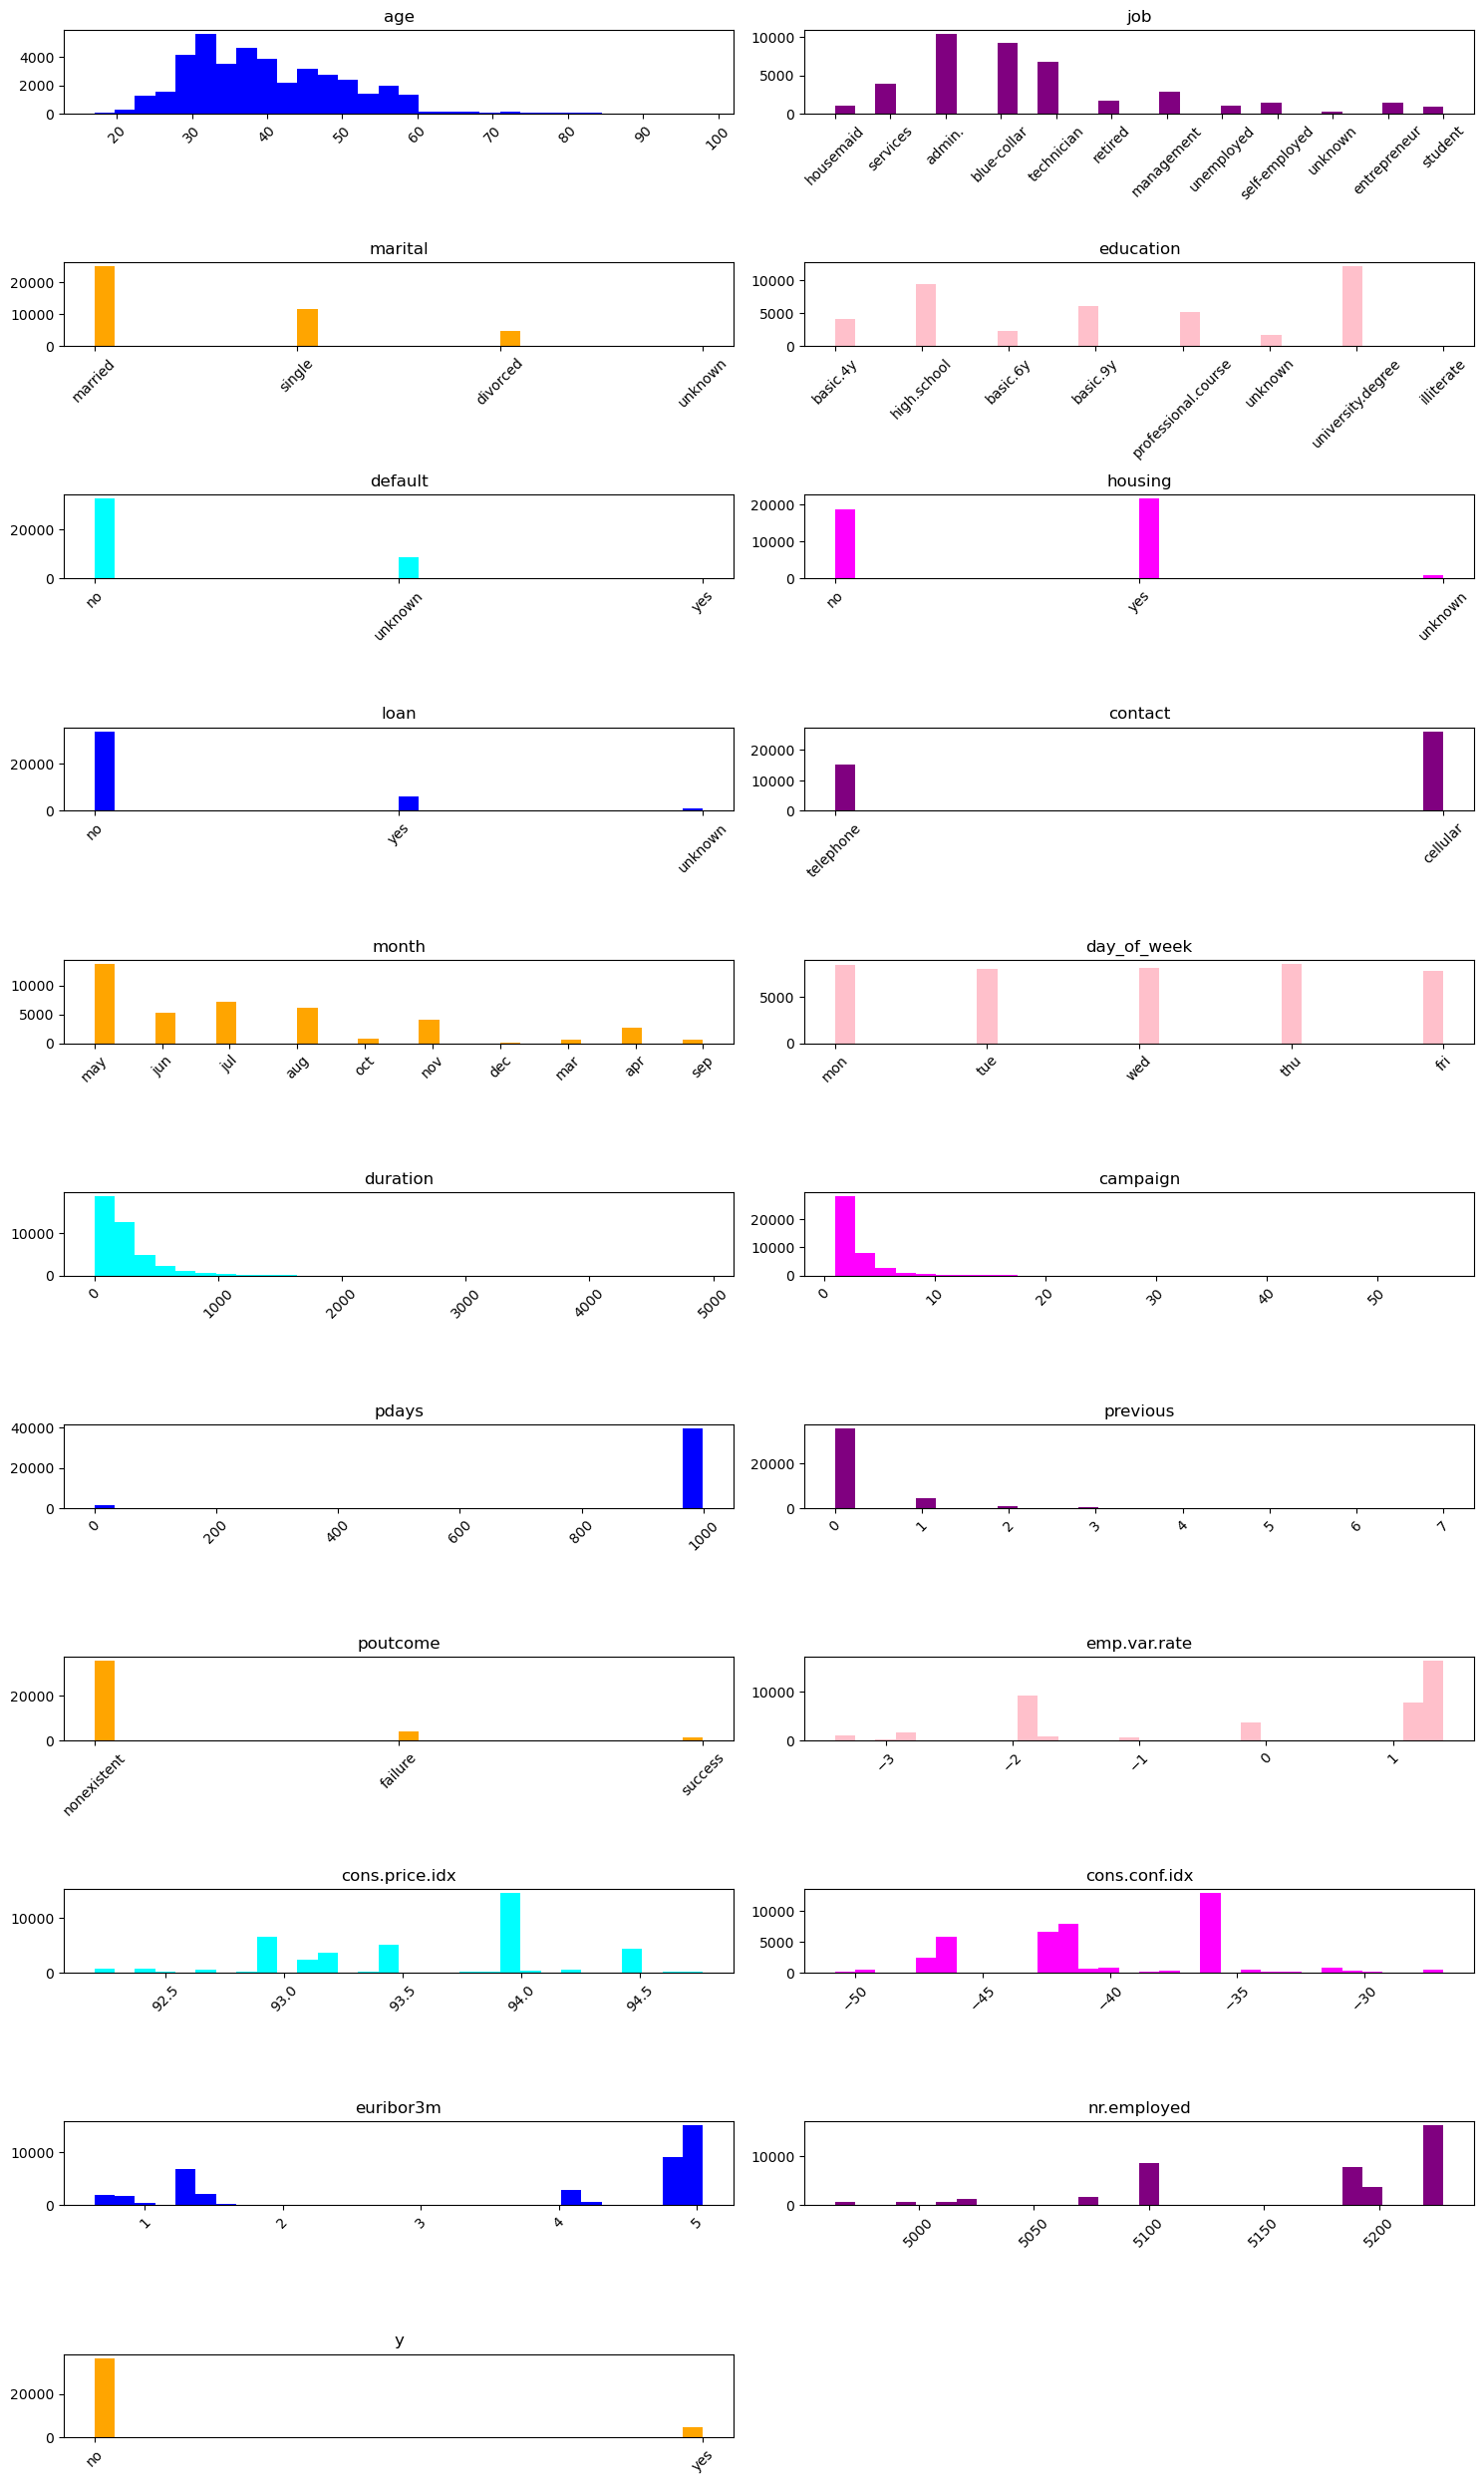

In [12]:
import itertools
plt.figure(figsize=(15, 25))
color_palette = itertools.cycle(['blue', 'purple', 'orange', 'pink', 'cyan', 'magenta'])
num_cols = len(column_headers)
num_rows = (num_cols + 1) // 2
for i, col in enumerate(df):
    plt.subplot(num_rows, 2, i + 1)
    plt.hist(df[col], bins=30, color=next(color_palette))
    plt.title(col)
    plt.xticks(rotation = 45)
plt.tight_layout(pad=1.0)
plt.show()

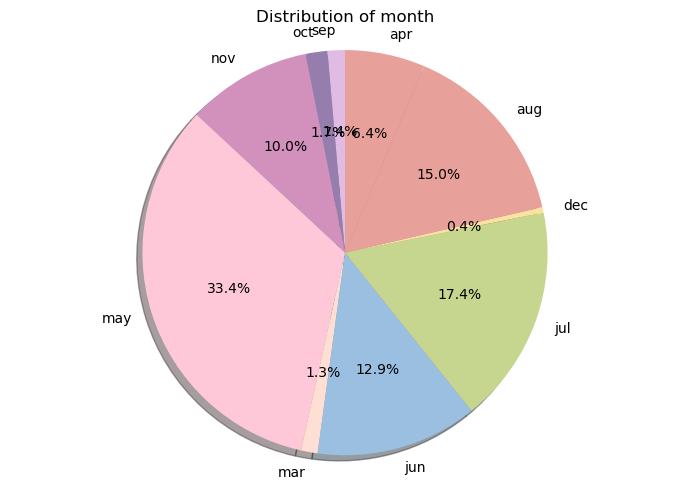

In [13]:
labels = df['month'].unique()
sizes = (df['month'].value_counts()/df['month'].value_counts().sum())*100
sizes = sizes.sort_index(ascending=False)
labels = sizes.index
plt.figure(figsize=(7,5))
colors = ['#E0BBE4', '#957DAD', '#D291BC', '#FEC8D8', '#FFDFD3','#9BBFE0','#C6D68F','#FBE29F','#E8A09A','#E8A09A']
plt.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
plt.axis('equal')
plt.title("Distribution of month")
plt.tight_layout()
plt.show()

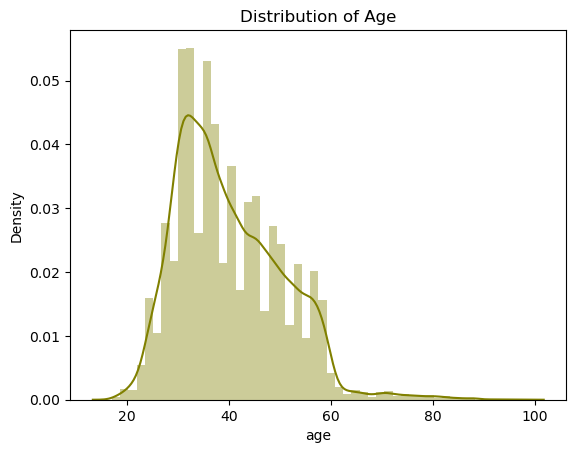

In [14]:
sns.distplot(df["age"],color="olive")
plt.title("Distribution of Age")
plt.show()

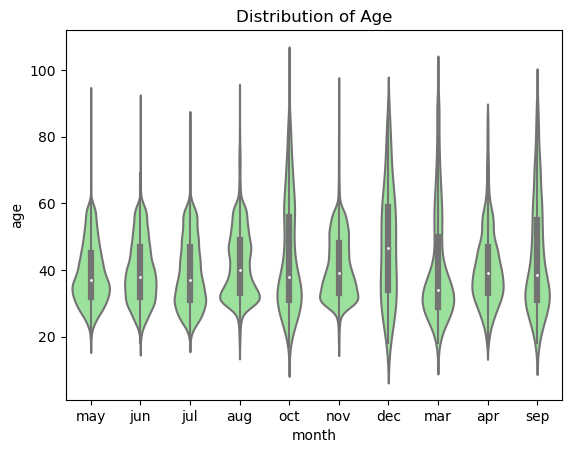

In [15]:
sns.violinplot(x="month",y="age",color="lightgreen",data=df)
plt.title("Distribution of Age")
plt.show()

<Axes: xlabel='age', ylabel='marital'>

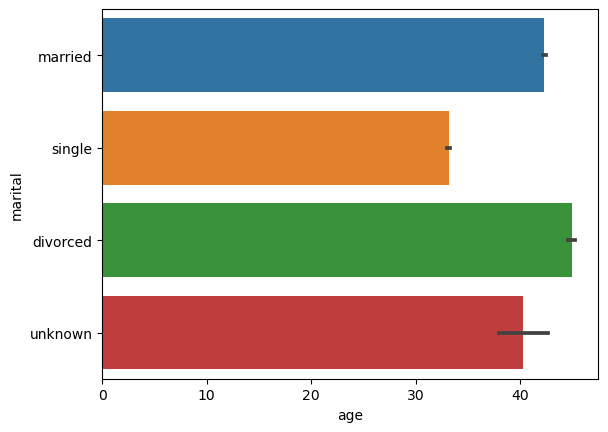

In [16]:
sns.barplot(x='age', y='marital',data=df)

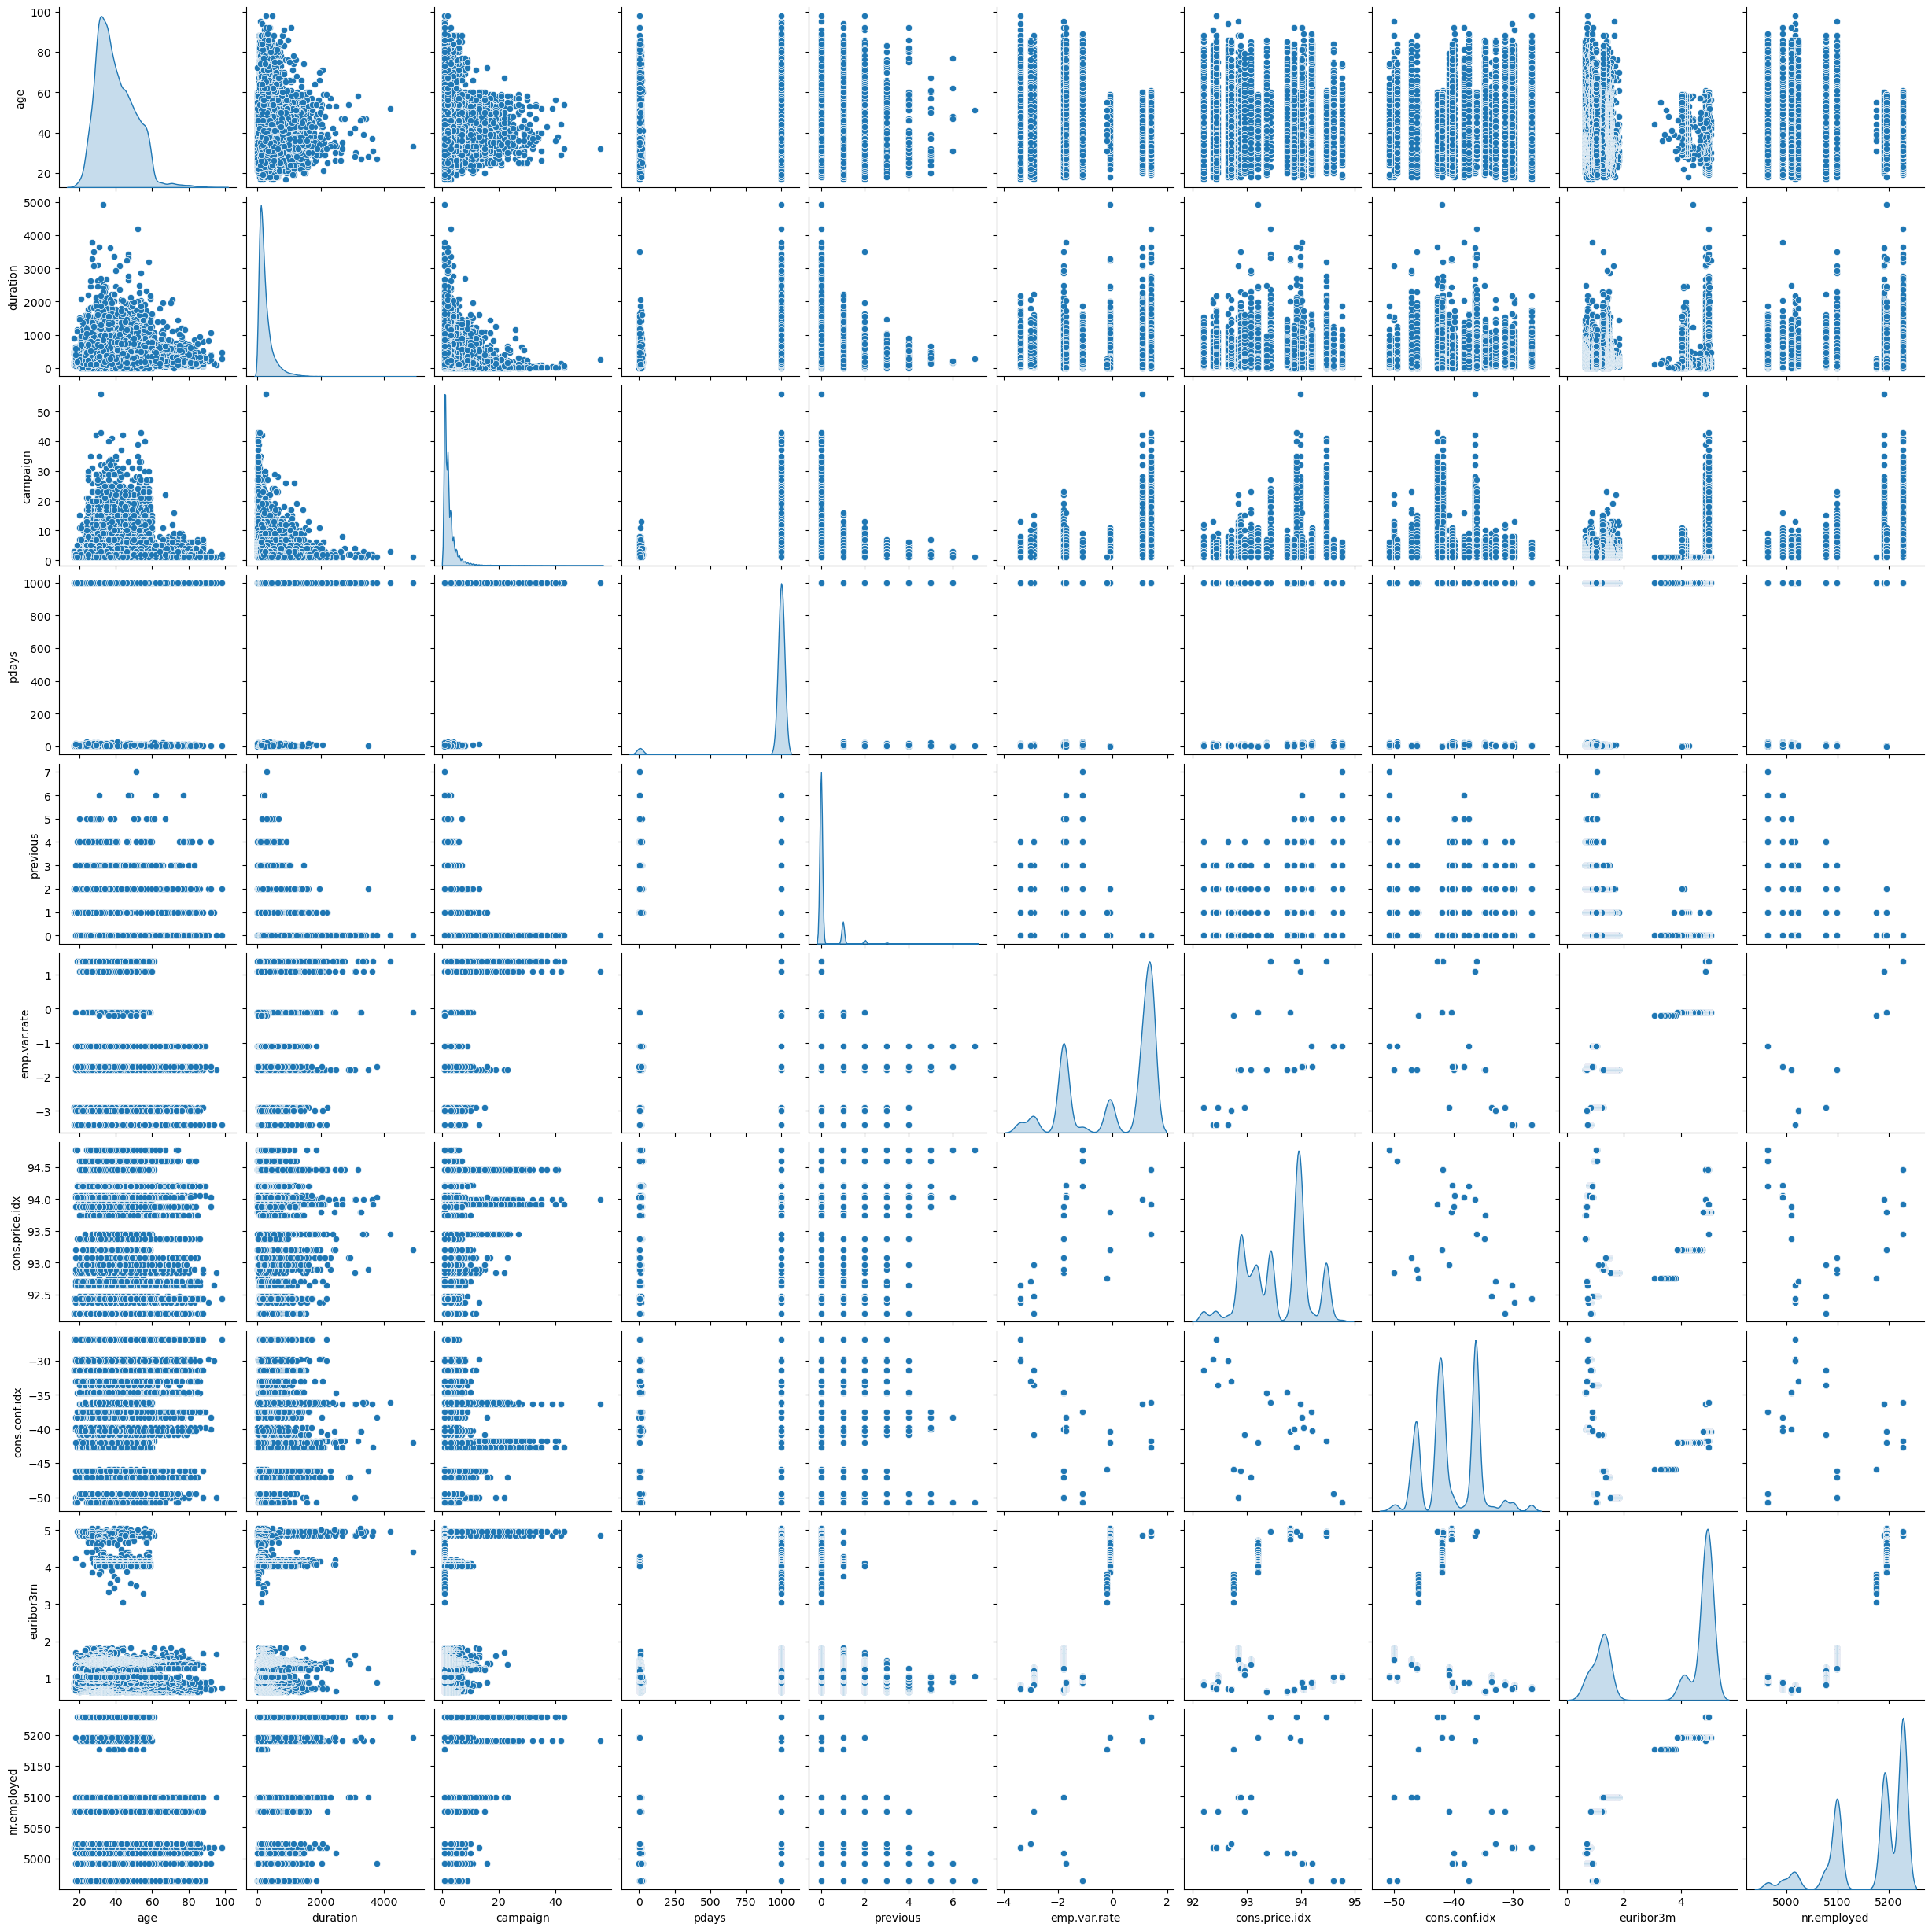

In [17]:
sns.pairplot(df,diag_kind="kde")

In [18]:
correlation=df.corr()

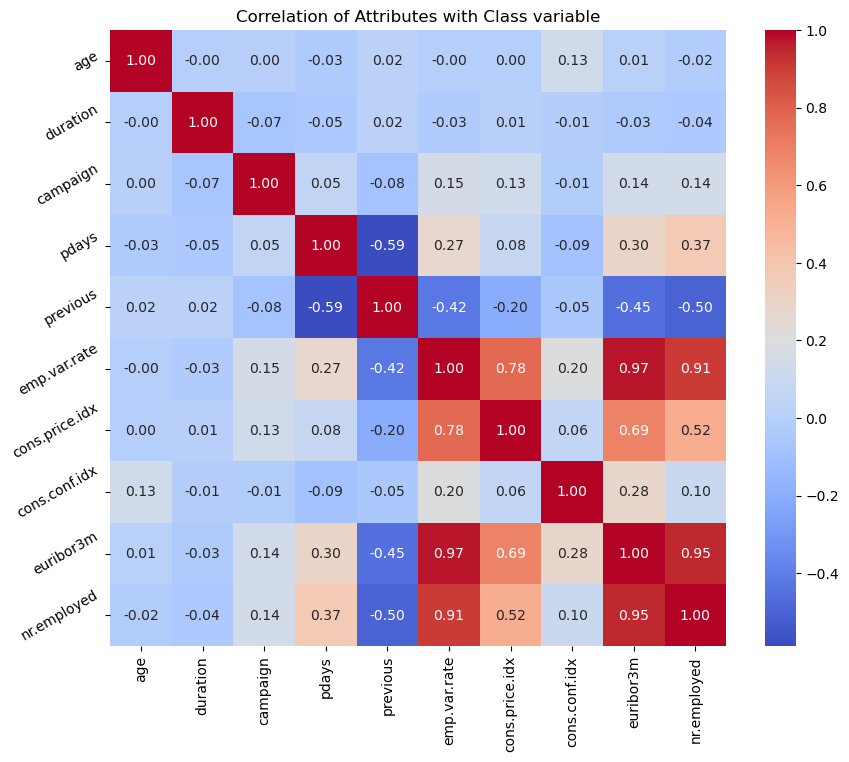

In [19]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white',cmap="coolwarm")
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)  
plt.show()

In [20]:
df=pd.get_dummies(df,columns=["job","marital","education","poutcome","default","housing","loan","contact","month","day_of_week"])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  object 
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

In [22]:
x=df.drop(["y"],axis=1)
y=df["y"]

In [23]:
x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size = 0.30,random_state = 0)

### SUPPORT VECTOR MACHINE

In [24]:
model_1=SVC(kernel="rbf")
model_1.fit(x_train,y_train)

SVC()

In [25]:
model_1.score(x_train,y_train)

0.8983039089868544

In [26]:
model_1.score(x_test,y_test)

0.8961722100833536

#### SUPPORT VECTOR MACHINE USING Z SCORE

In [27]:
from scipy.stats import zscore

In [28]:
xscale=x.apply(zscore)

In [29]:
x_train , x_test ,y_train ,y_test = train_test_split(xscale,y,test_size = 0.30,random_state = 0)

In [30]:
model_1=SVC(kernel="rbf")
model_1.fit(x_train,y_train)

SVC()

In [31]:
model_1.score(x_train,y_train)

0.926606777427075

In [32]:
model_1.score(x_test,y_test)

0.9092012624423403

#### Scaler

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
std=StandardScaler()

In [37]:
x_train_scaled=std.fit_transform(x_train)
x_test_scaled=std.fit_transform(x_test)

### SUPPORT VECTOR MACHINE FOR SCALAR

In [41]:
model_1=SVC(kernel="rbf")
model_1.fit(x_train_scaled,y_train)

SVC()

In [42]:
model_1.score(x_train_scaled,y_train)

0.9265027227636918

In [44]:
model_1.score(x_test_scaled,y_test)

0.9095249656065388